In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [2]:
df=pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")

In [3]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [4]:
df.sum()

X1       586.880
X2    515872.000
X3    244608.000
X4    135632.000
X5      4032.000
X6      2688.000
X7       180.000
X8      2160.000
Y1     17131.926
Y2     18883.400
dtype: float64

In [5]:
#check for missing 
df.isnull().sum()


X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [6]:
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
'X6': 'Orientation', 'X7': 'Glazing_Area',
'X8': 'Glazing_Area_Distribution',
'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

In [7]:
df = df.rename(columns=column_names)

In [8]:
#select a sample of the dataset
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)

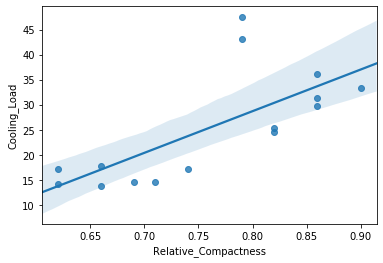

In [9]:
sns.regplot(x="Relative_Compactness", y="Cooling_Load",data=simple_linear_reg_df)

In [10]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [11]:
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])

In [12]:
heating_target = normalised_df['Heating_Load']


In [13]:
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target,test_size=0.3, random_state=1)


In [14]:
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn import linear_model
linear_model = LinearRegression()

In [15]:
#fit the model to the training dataset
import sklearn
from sklearn import linear_model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
predicted_values = linear_model.predict(x_test)


In [16]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) 
#Print 0.063

0.063

In [17]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3) #prints 1.817

1.817

In [18]:

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) #prints 0.089

0.089

In [19]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3) #prints 0.894

0.894

In [20]:
#: Penalization Methods
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
#Feature Selection and Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [30]:
model = LinearRegression()
model.fit(x_train, y_train)
linear_model_weights = get_weights_df(model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Relative_Compactness,-0.606412,-0.283471,-0.027719
1,Roof_Area,-0.328099,-0.163192,-0.000000
2,Surface_Area,-0.235022,-0.062275,0.000000
3,Orientation,0.003399,0.003369,0.000000
4,Wall_Area,0.018947,0.103061,0.200087
5,Glazing_Area_Distribution,0.028452,0.029088,0.021431
6,Glazing_Area,0.215042,0.212449,0.206132
7,Overall_Height,0.393549,0.442467,0.463482
